<a href="https://colab.research.google.com/github/Palakk06/Data-Analytics-Visualisation/blob/main/wallmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/WaLLMART.txt")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_numerical_category,Genderr
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,6,0


In [ ]:
df.shape

(550068, 10)

In [ ]:
age_mapping = {
    '0-17':0,
    '55+':6,
    '26-35':2,
    '46-50':4,
    '51-55':5,
    '36-45':3
    ,'18-25': 1
}

In [ ]:
df["Age_numerical_category"] = df["Age"].map(age_mapping)

In [ ]:
df["Genderr"] = df.Gender.apply(lambda x: 1 if x == "F" else 0)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_numerical_category,Genderr
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,6,0


In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df.shape

(550068, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [ ]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
df.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df.Occupation.value_counts().sort_values(ascending = False)

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

23961
12


<Axes: ylabel='Purchase'>

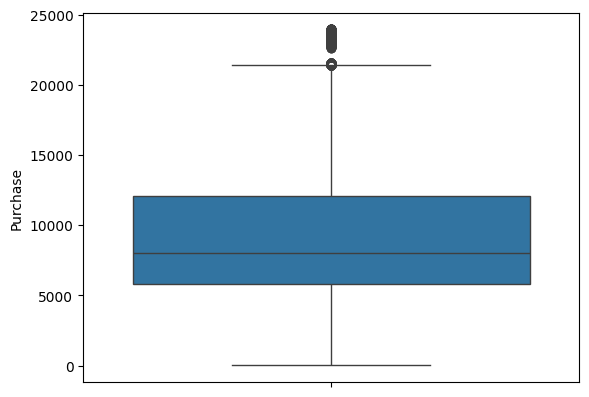

In [ ]:
#Outliers detection
print(df.Purchase.max())
print(df.Purchase.min())
sns.boxplot(y = df["Purchase"])

In [ ]:
income_75_percentile = np.percentile(df.Purchase, 75)
income_25_percentile = np.percentile(df.Purchase, 25)
income_IQR =  income_75_percentile - income_25_percentile
max_income_limit = income_75_percentile + (1.5* income_IQR)
min_income_limit = max(0, income_25_percentile - (1.5*income_IQR))
print(max_income_limit, min_income_limit)
print(f'The max value of Purchase amount which is not an outlier is {max_income_limit} so any value above this would be an outlier')

21400.5 0
The max value of Purchase amount which is not an outlier is 21400.5 so any value above this would be an outlier


In [ ]:
#calculating the number of outliers
(df["Purchase"] > max_income_limit).sum()

2677

<Axes: xlabel='Gender', ylabel='Purchase'>

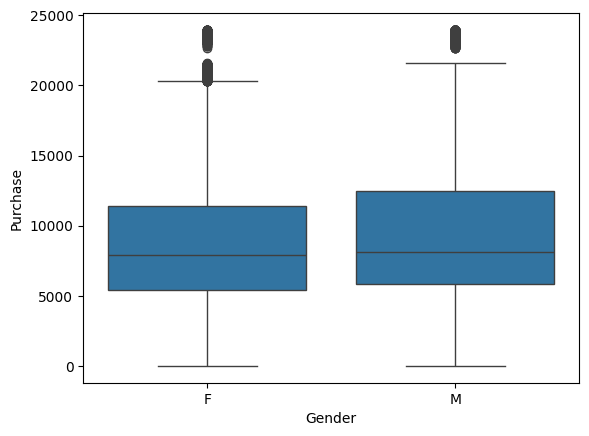

In [ ]:
# Amount spent based on the Gender

sns.boxplot(x = df.Gender, y = df.Purchase)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

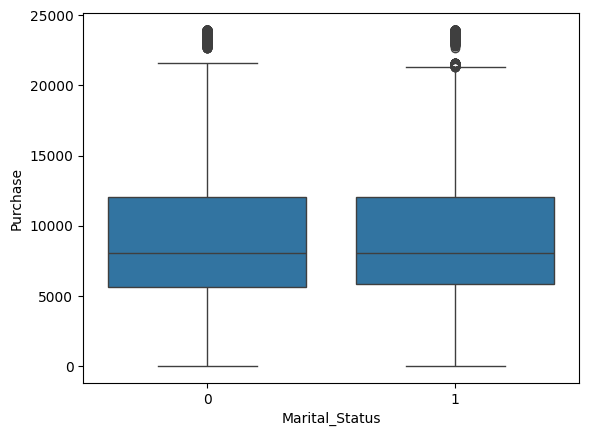

In [ ]:
#Amount spent based on Marital Status
sns.boxplot(x = df.Marital_Status, y = df.Purchase)

<Axes: xlabel='Age', ylabel='Purchase'>

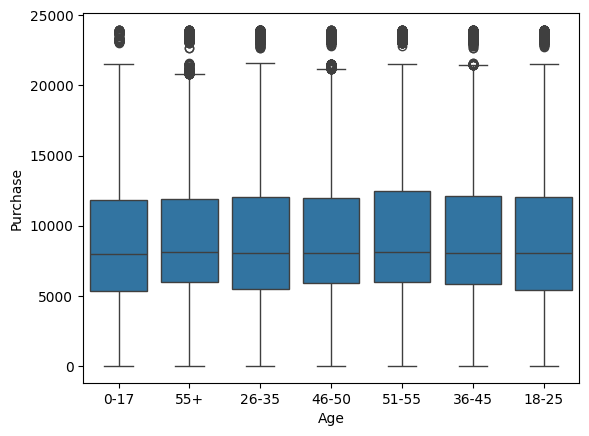

In [ ]:
#Amount spent vs Age
sns.boxplot(x = df.Age, y = df.Purchase)

<Axes: xlabel='City_Category', ylabel='Purchase'>

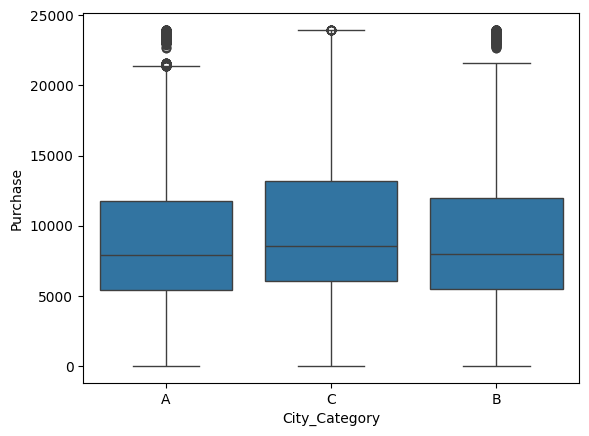

In [ ]:
#Analysis based on city_category
sns.boxplot(x = df.City_Category, y= df.Purchase)

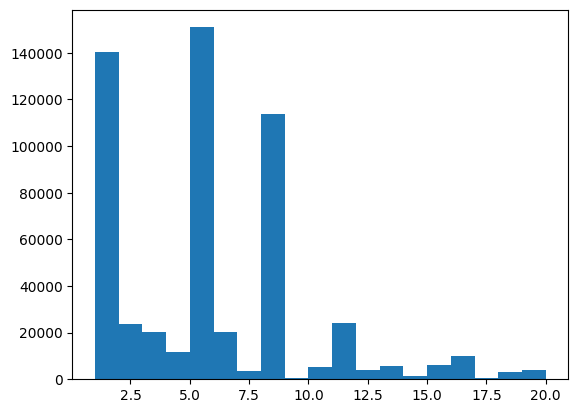

In [ ]:
plt.hist(x = df.Product_Category, bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

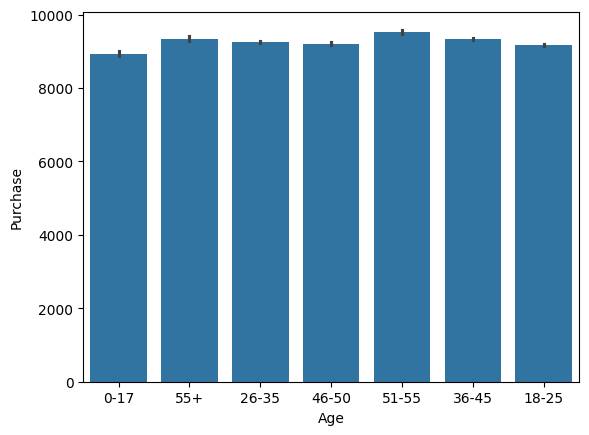

In [ ]:
sns.barplot(x = df.Age, y = df.Purchase)

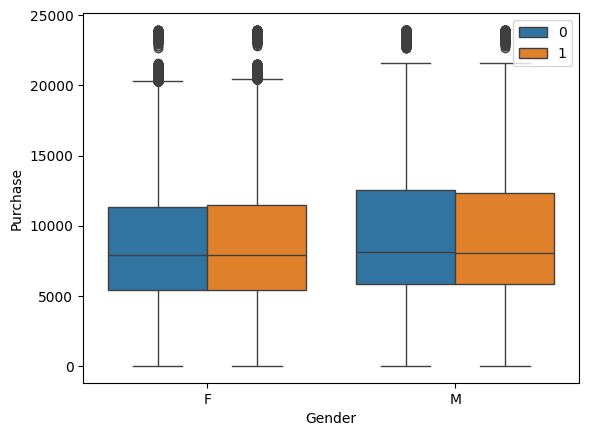

In [ ]:
sns.boxplot(x = df.Gender, y = df.Purchase, hue = df.Marital_Status)
plt.legend(loc = "upper right")
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

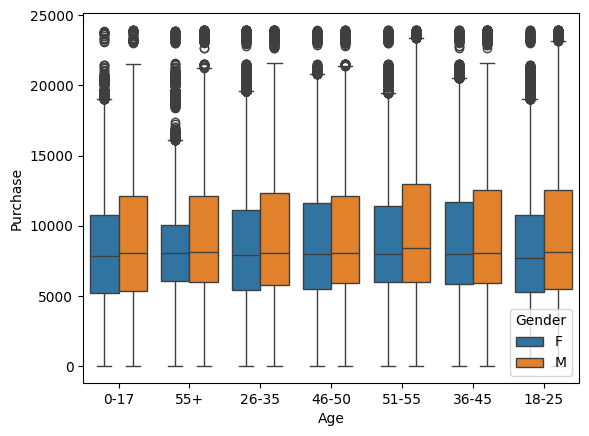

In [ ]:
#Analysis between purchase amount and gender
sns.boxplot(y = df.Purchase, x = df.Age, hue = df.Gender)

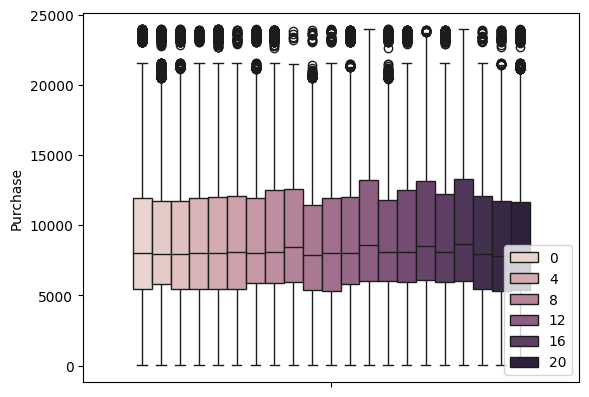

In [ ]:
#Analysis between purchase amount and Occupation
sns.boxplot(y = df.Purchase, hue = df.Occupation)
plt.legend(loc='lower right')

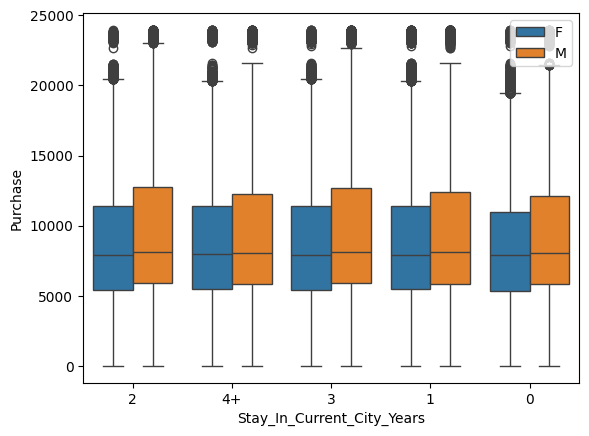

In [ ]:
#Analysis between purchase amount and Stay in current city
sns.boxplot(y = df.Purchase, x = df.Stay_In_Current_City_Years, hue = df.Gender)
plt.legend(loc = "upper right")

In [ ]:
most_bought_product_per_age_group = df.groupby("Age")["Product_Category"].apply(lambda x: x.value_counts().idxmax())
print(most_bought_product_per_age_group)


Age
0-17     5
18-25    5
26-35    5
36-45    5
46-50    5
51-55    5
55+      8
Name: Product_Category, dtype: int64


<Axes: xlabel='Age', ylabel='Purchase'>

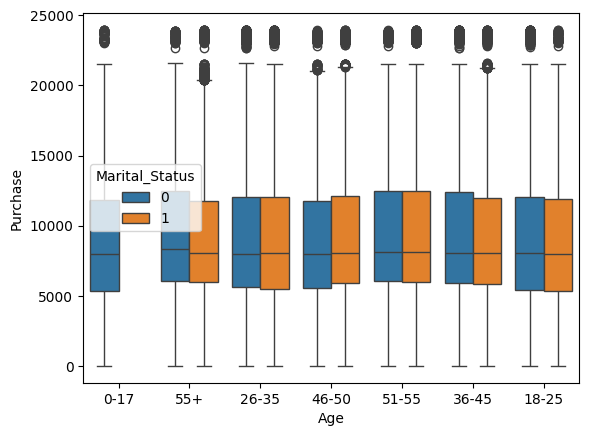

In [ ]:
#analyzing the relationship between the age, marital status and amount spend
sns.boxplot(x = df.Age, y = df.Purchase, hue = df.Marital_Status)

In [ ]:
#We can observe by the chart above, that when unmarried people spend more as compared to the married people

In [ ]:
df[["Age_numerical_category", "Marital_Status", "Purchase"]].corr()

,Age_numerical_category,Marital_Status,Purchase
Age_numerical_category,1.000000,0.311738,0.015839
Marital_Status,0.311738,1.000000,-0.000463
Purchase,0.015839,-0.000463,1.000000


<Axes: >

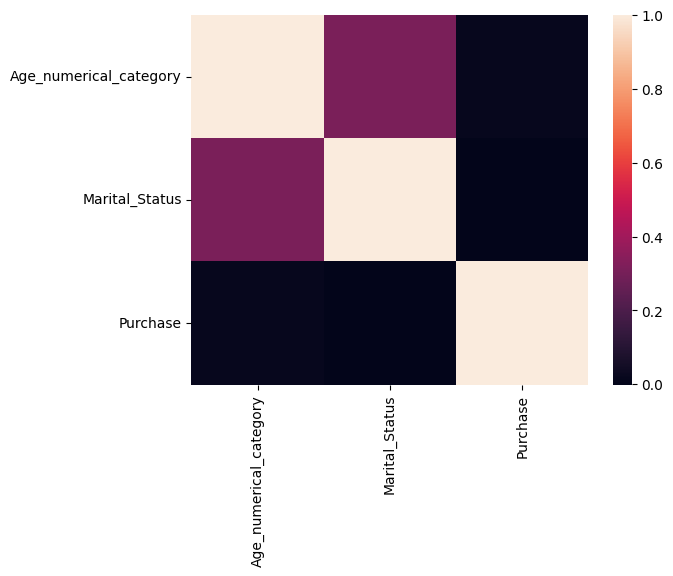

In [ ]:
sns.heatmap(df[["Age_numerical_category", "Marital_Status", "Purchase"]].corr())

In [ ]:
'''Analysis:
- This coefficient indicates a very weak positive correlation between age (in numerical categories) and purchase amount.
A value of 0.015839 suggests that age has almost no effect on the purchase amount.
- This coefficient indicates a very weak negative correlation between marital status and purchase amount.
 A value of -0.000463 suggests that marital status has almost no effect on the purchase amount.
'''

'Analysis:\n- This coefficient indicates a very weak positive correlation between age (in numerical categories) and purchase amount.\nA value of 0.015839 suggests that age has almost no effect on the purchase amount.\n- This coefficient indicates a very weak negative correlation between marital status and purchase amount.\n A value of -0.000463 suggests that marital status has almost no effect on the purchase amount.\n'

In [ ]:
#preferred categories for female customers
df.loc[df["Gender"] == 'F'].Product_Category.value_counts()[:5]

Product_Category
5    41961
8    33558
1    24831
3     6006
2     5658
Name: count, dtype: int64

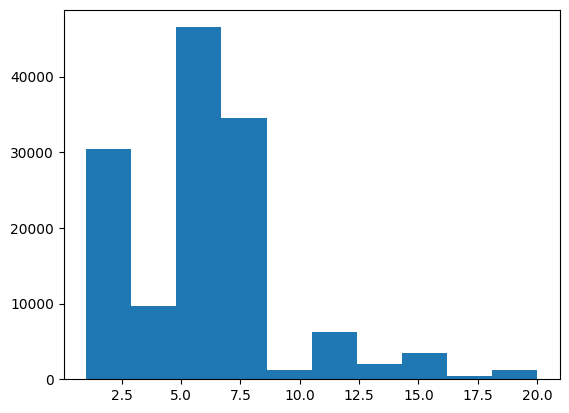

In [ ]:
#preferred categories for female customers
plt.hist(x = df.loc[df["Gender"] == 'F'].Product_Category)
plt.show()

In [ ]:
#preferred categories for male customers
df.loc[df["Gender"] == 'M'].Product_Category.value_counts()[:5]

Product_Category
1     115547
5     108972
8      80367
11     19548
2      18206
Name: count, dtype: int64

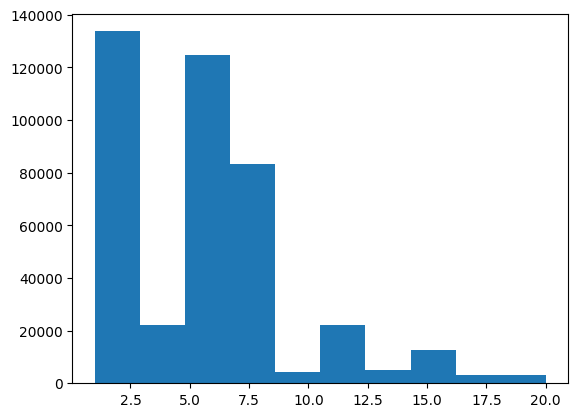

In [ ]:
#preferred categories for male customers
plt.hist(x = df.loc[df["Gender"] == 'M'].Product_Category)
plt.show()

In [ ]:
'''
By Checking and comparing the data among males, we can find that the Product category 1 is being preferred by Males followed by 5,8,11 and 2.
For Female customers, the product category 5 is leading and followed by 8,3,1 and 2.
'''

'\nBy Checking and comparing the data among males, we can find that the Product category 1 is being preferred by Males followed by 5,8,11 and 2.\nFor Female customers, the product category 5 is leading and followed by 8,3,1 and 2.\n'

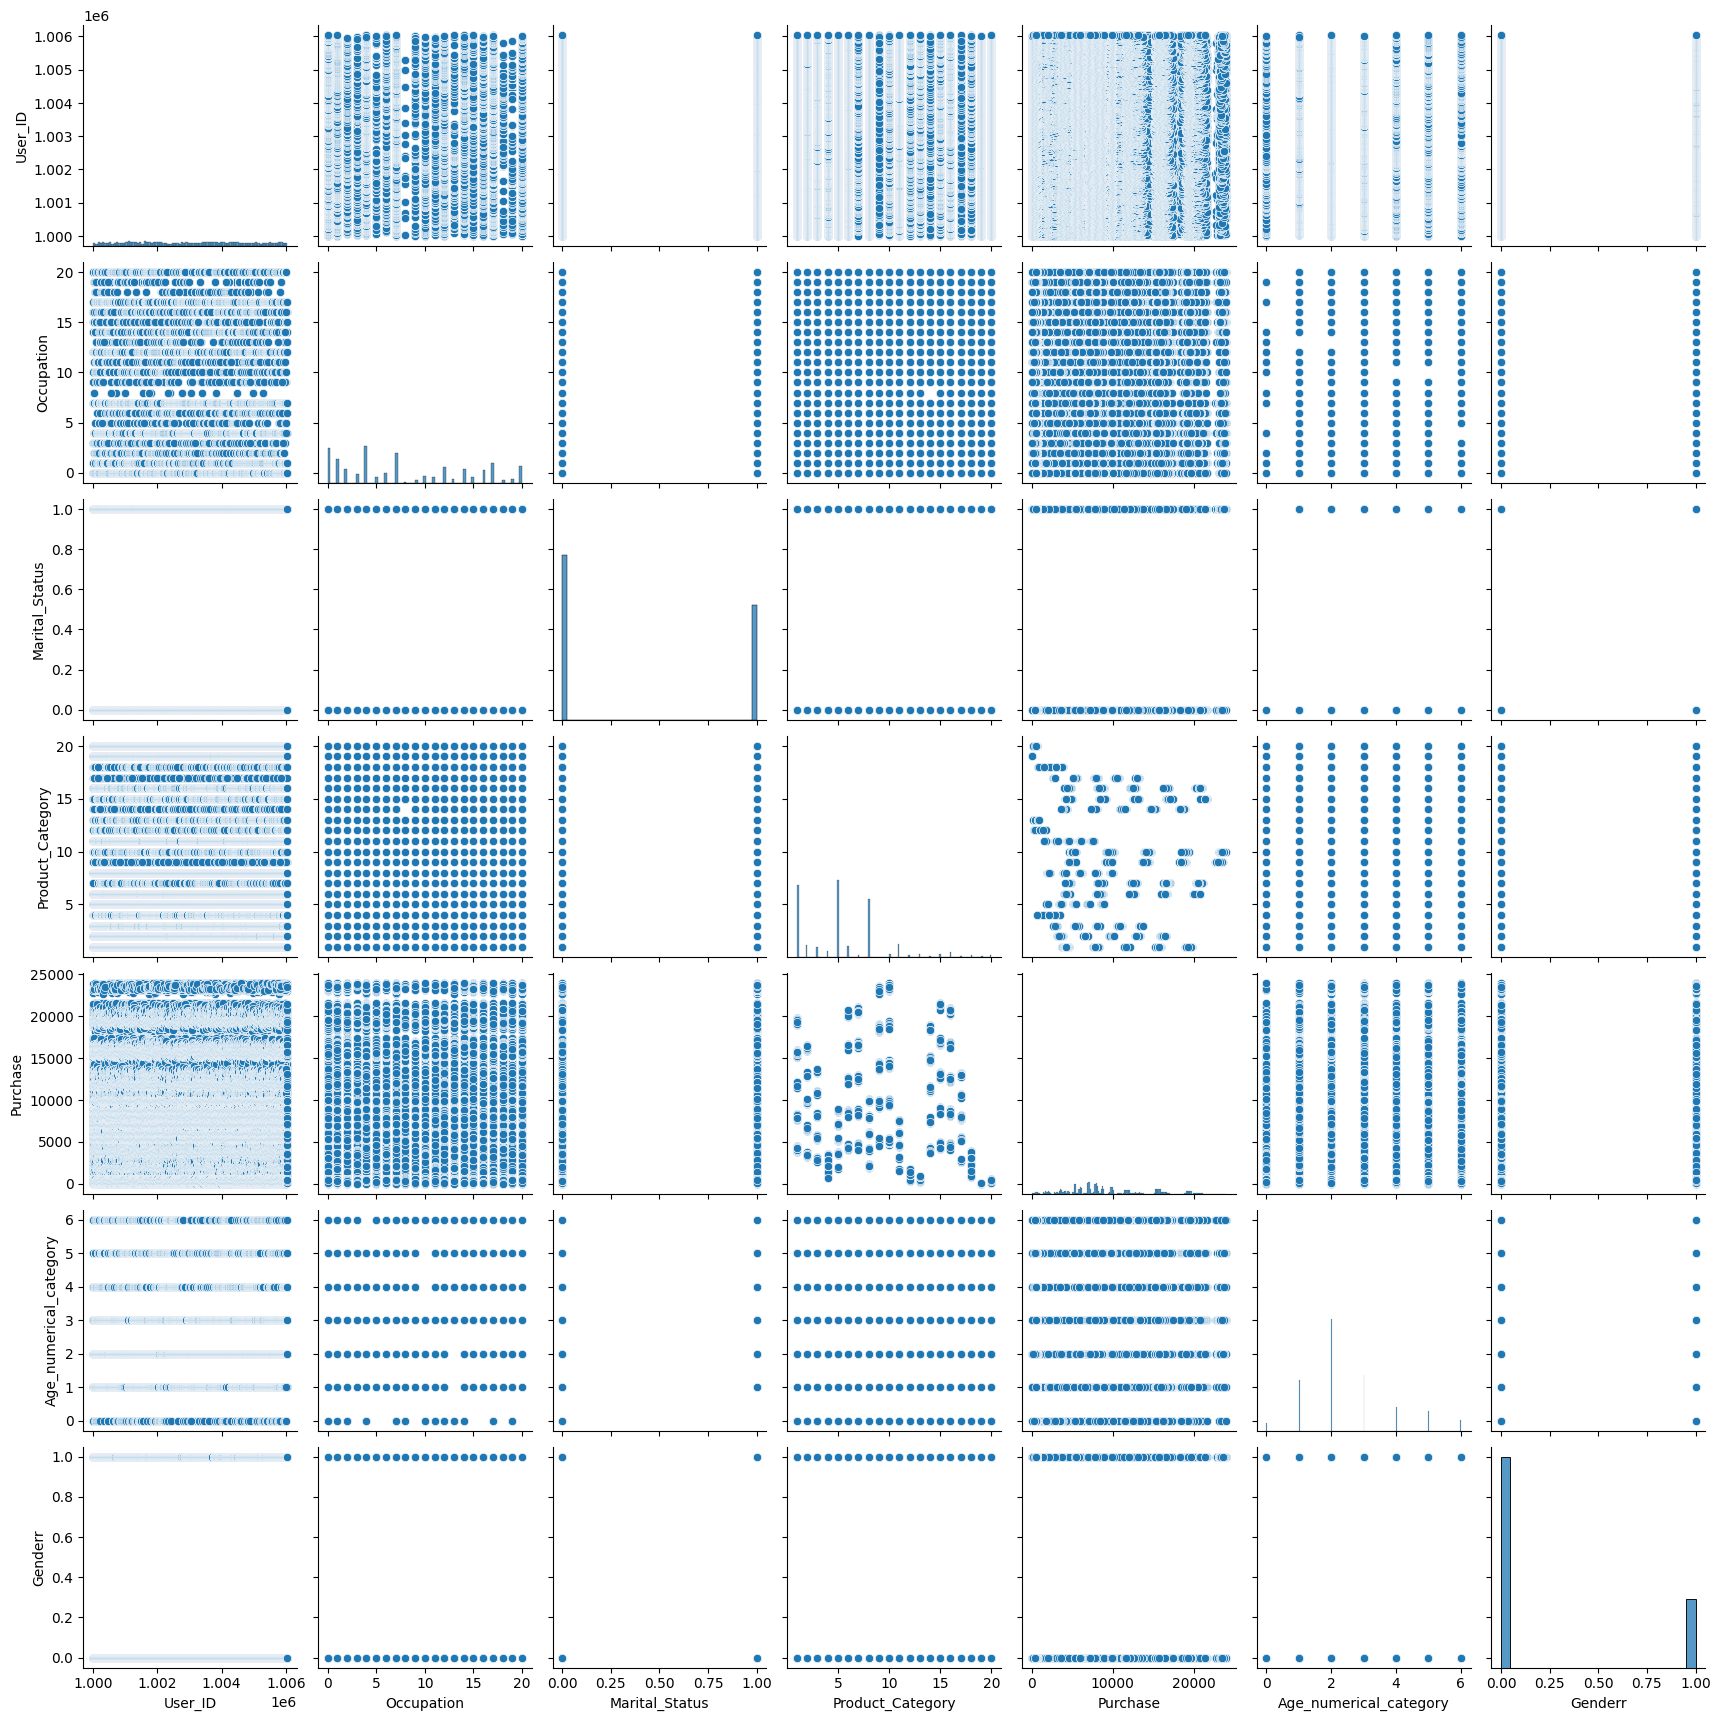

In [ ]:
#Analyzing all the variables in the dataset
sns.pairplot(df)


<Axes: xlabel='Purchase', ylabel='Count'>

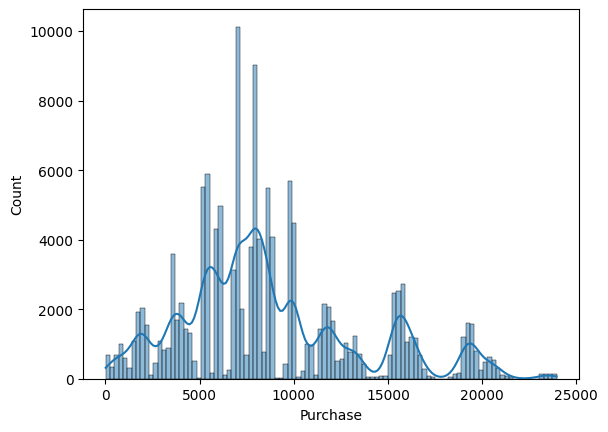

In [ ]:
female_customers = df.loc[df["Gender"] == 'F']
male_customers = df.loc[df["Gender"] == 'M']
sns.histplot(x = female_customers["Purchase"], kde = True)

In [ ]:
# Function to compute confidence interval using CLT
def compute_clt_confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    std_err = std_dev / np.sqrt(len(data))
    z = norm.ppf(0.975)
    lower_limit = mean - (z * std_err)
    upper_limit = mean + (z * std_err)
    return lower_limit, upper_limit

# Full data confidence interval
lower_limit_full, upper_limit_full = compute_clt_confidence_interval(female_customers["Purchase"])
print(f"Full data CI for Female Customers: [{lower_limit_full}, {upper_limit_full}]")

Full data CI for Female Customers: [8709.21154714068, 8759.919983170272]


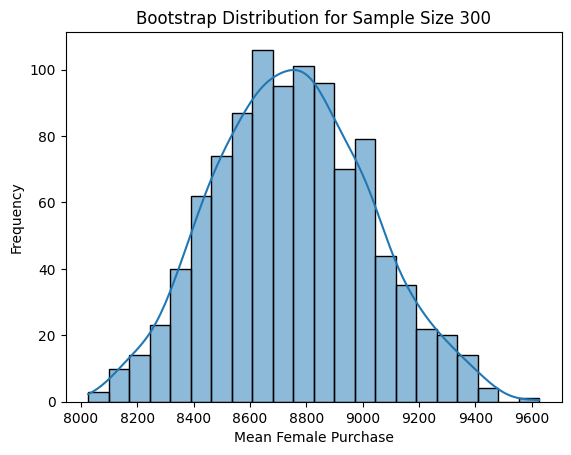

Sample size 300 CI: [8229.790833333333, 9301.37025]


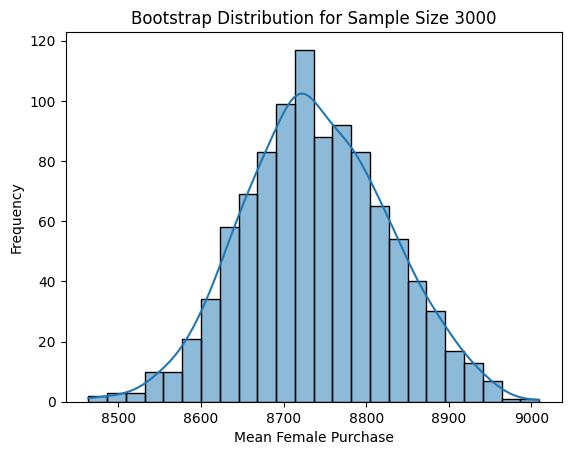

Sample size 3000 CI: [8571.992016666667, 8913.9744]


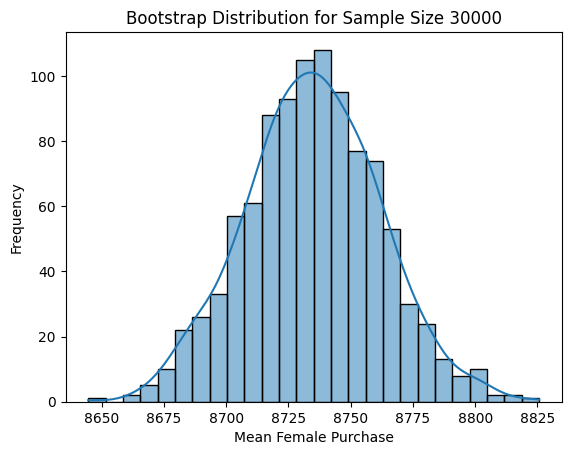

Sample size 30000 CI: [8681.876656666667, 8787.448764166667]


In [ ]:
#Calculating the confidence interval using Bootstrapping method
def bootstrap_confidence_interval(data, sample_size, n_bootstrap=1000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means[i] = np.mean(sample)

    # Plot the bootstrap distribution
    sns.histplot(bootstrap_means, kde=True)
    plt.title(f'Bootstrap Distribution for Sample Size {sample_size}')
    plt.xlabel('Mean Female Purchase')
    plt.ylabel('Frequency')
    plt.show()

    lower_limit = np.percentile(bootstrap_means, 2.5)
    upper_limit = np.percentile(bootstrap_means, 97.5)
    return lower_limit, upper_limit

# Sample sizes to analyze
sample_sizes = [300, 3000, 30000]

for size in sample_sizes:
    lower_limit, upper_limit = bootstrap_confidence_interval(female_customers["Purchase"], size)
    print(f"Sample size {size} CI: [{lower_limit}, {upper_limit}]")


In [ ]:
# Function to compute confidence interval using CLT
def compute_clt_confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    std_err = std_dev / np.sqrt(len(data))
    z = norm.ppf(0.975)
    lower_limit = mean - (z * std_err)
    upper_limit = mean + (z * std_err)
    return lower_limit, upper_limit

# Full data confidence interval
lower_limit_full, upper_limit_full = compute_clt_confidence_interval(male_customers["Purchase"])
print(f"Full data CI for Male Customers: [{lower_limit_full}, {upper_limit_full}]")

Full data CI for Male Customers: [9422.01944736257, 9453.032633581959]


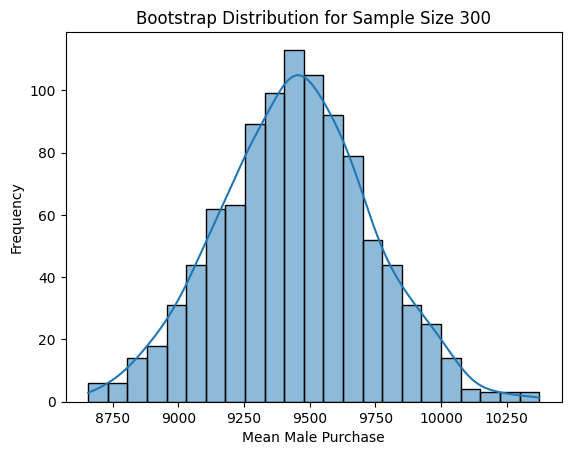

Sample size 300 CI: [8879.188333333334, 10007.711083333334]


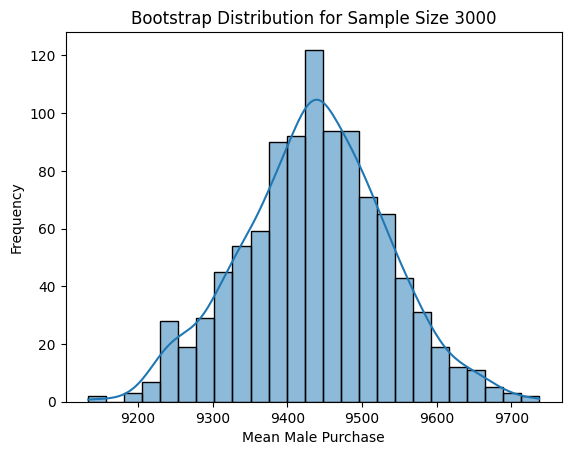

Sample size 3000 CI: [9241.625008333333, 9629.542658333334]


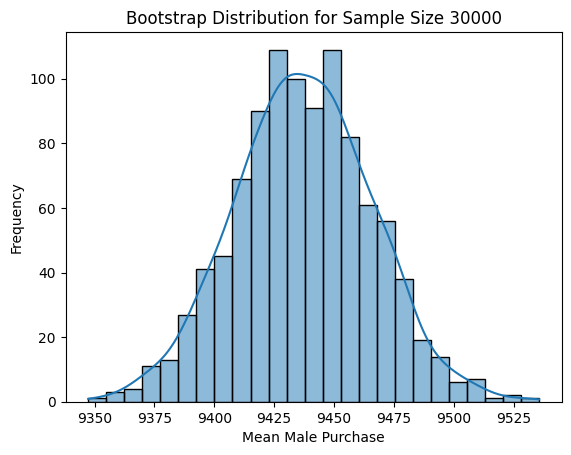

Sample size 30000 CI: [9380.429416666666, 9493.7964675]


In [ ]:
#Calculating the bootstrapping interval for the male customers
def bootstrap_confidence_interval(data, sample_size, n_bootstrap=1000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means[i] = np.mean(sample)

    # Plot the bootstrap distribution
    sns.histplot(bootstrap_means, kde=True)
    plt.title(f'Bootstrap Distribution for Sample Size {sample_size}')
    plt.xlabel('Mean Male Purchase')
    plt.ylabel('Frequency')
    plt.show()

    lower_limit = np.percentile(bootstrap_means, 2.5)
    upper_limit = np.percentile(bootstrap_means, 97.5)
    return lower_limit, upper_limit

# Sample sizes to analyze
sample_sizes = [300, 3000, 30000]

for size in sample_sizes:
    lower_limit, upper_limit = bootstrap_confidence_interval(male_customers["Purchase"], size)
    print(f"Sample size {size} CI: [{lower_limit}, {upper_limit}]")


In [ ]:
'''
i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
Inference:

For female customers, the confidence interval computed using the CLT method is narrower ([8709.21, 8759.92]) compared to that of male customers ([9422.02, 9453.03]).
This suggests that there is less variability in the amount spent by male customers compared to female customers.
ii. How is the width of the confidence interval affected by the sample size?
Inference:

For both genders, as the sample size increases, the width of the confidence interval decreases.
For example, for female customers, the confidence interval narrows from 300 to 30000 sample size: [8249.21, 9270.02] to [8684.53, 8788.55].
iii. Do the confidence intervals for different sample sizes overlap?
Inference:

For female customers, the confidence intervals for different sample sizes overlap, suggesting no significant difference in the average amount spent between these sample sizes.
For male customers, the confidence intervals also overlap, indicating a similar finding.
iv. How does the sample size affect the shape of the distributions of the means?
Inference:

As the sample size increases, the distribution of the means becomes more symmetrical and approaches a normal distribution, consistent with the Central Limit Theorem.
By analyzing these inferences, you can provide comprehensive answers to the questions asked, addressing the variability in the data, the impact of sample size on precision, the potential differences between sample sizes, and the behavior of sample means with increasing sample size.
'''

'\ni. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?\nInference:\n\nFor female customers, the confidence interval computed using the CLT method is narrower ([8709.21, 8759.92]) compared to that of male customers ([9422.02, 9453.03]).\nThis suggests that there is less variability in the amount spent by male customers compared to female customers.\nii. How is the width of the confidence interval affected by the sample size?\nInference:\n\nFor both genders, as the sample size increases, the width of the confidence interval decreases.\nFor example, for female customers, the confidence interval narrows from 300 to 30000 sample size: [8249.21, 9270.02] to [8684.53, 8788.55].\niii. Do the confidence intervals for different sample sizes overlap?\nInference:\n\nFor female customers, the confidence intervals for different sample sizes overlap, suggesting no significant difference in the average amount spent between these sample si

In [ ]:
#Married Customers vs Unmarried Customers vs Amount spent
married_customers = df.loc[df["Marital_Status"] == 1]
unmarried_customers = df.loc[df["Marital_Status"] == 0]

In [ ]:
# Function to compute confidence interval using CLT
def compute_clt_confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    std_err = std_dev / np.sqrt(len(data))
    z = norm.ppf(0.975)
    lower_limit = mean - (z * std_err)
    upper_limit = mean + (z * std_err)
    return lower_limit, upper_limit

# Full data confidence interval
lower_limit_full, upper_limit_full = compute_clt_confidence_interval(married_customers["Purchase"])
print(f"Full data CI for Married Customers: [{lower_limit_full}, {upper_limit_full}]")

Full data CI for Married Customers: [9240.460427057078, 9281.888721107669]


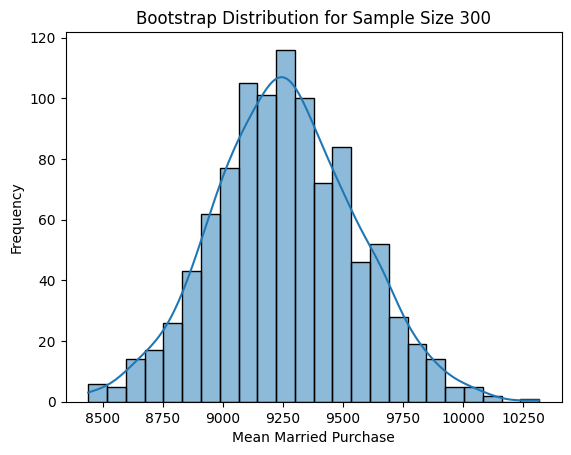

Sample size 300 CI: [8681.692333333334, 9849.661999999998]


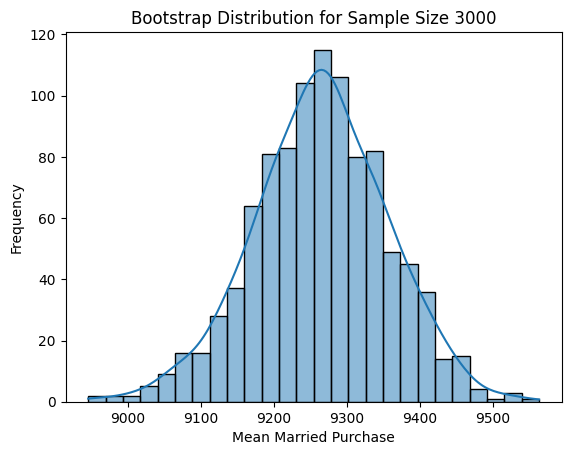

Sample size 3000 CI: [9074.444575, 9440.467758333332]


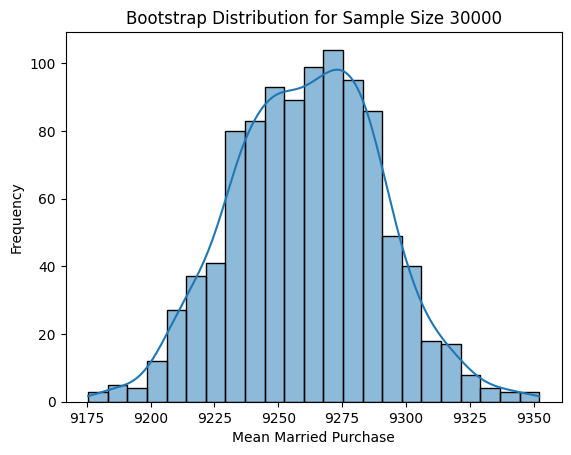

Sample size 30000 CI: [9207.585545833334, 9317.761169166666]


In [ ]:
#Calculating the bootstrapping interval for the male customers
def bootstrap_confidence_interval(data, sample_size, n_bootstrap=1000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means[i] = np.mean(sample)

    # Plot the bootstrap distribution
    sns.histplot(bootstrap_means, kde=True)
    plt.title(f'Bootstrap Distribution for Sample Size {sample_size}')
    plt.xlabel('Mean Married Purchase')
    plt.ylabel('Frequency')
    plt.show()

    lower_limit = np.percentile(bootstrap_means, 2.5)
    upper_limit = np.percentile(bootstrap_means, 97.5)
    return lower_limit, upper_limit

# Sample sizes to analyze
sample_sizes = [300, 3000, 30000]

# Assuming female_customers["Purchase"] is your data
for size in sample_sizes:
    lower_limit, upper_limit = bootstrap_confidence_interval(married_customers["Purchase"], size)
    print(f"Sample size {size} CI: [{lower_limit}, {upper_limit}]")


In [ ]:
# Function to compute confidence interval using CLT
def compute_clt_confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    std_err = std_dev / np.sqrt(len(data))
    z = norm.ppf(0.975)
    lower_limit = mean - (z * std_err)
    upper_limit = mean + (z * std_err)
    return lower_limit, upper_limit

# Full data confidence interval
lower_limit_full, upper_limit_full = compute_clt_confidence_interval(unmarried_customers["Purchase"])
print(f"Full data CI for Unarried Customers: [{lower_limit_full}, {upper_limit_full}]")

Full data CI for Unarried Customers: [9248.61641818668, 9283.198819656332]


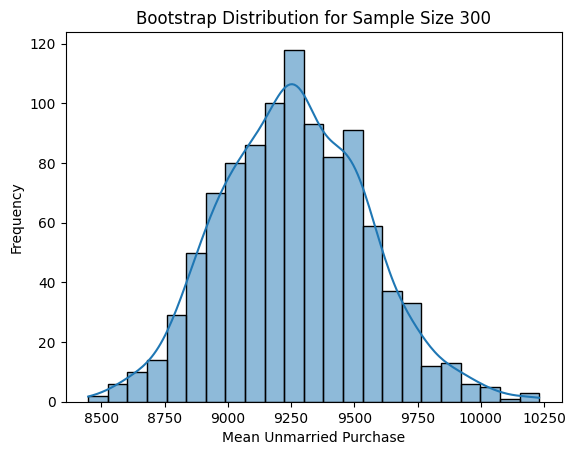

Sample size 300 CI: [8727.31625, 9865.992833333332]


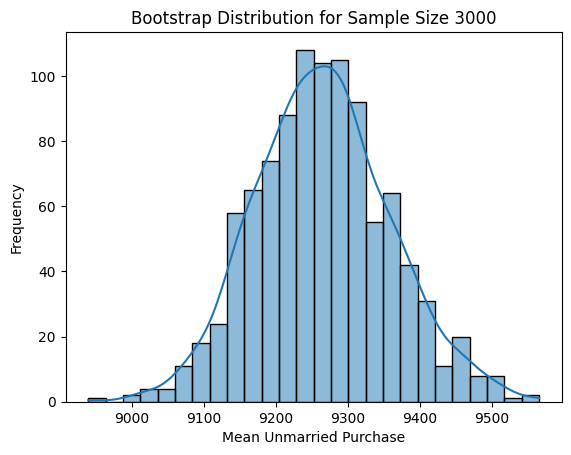

Sample size 3000 CI: [9086.083958333333, 9459.218908333334]


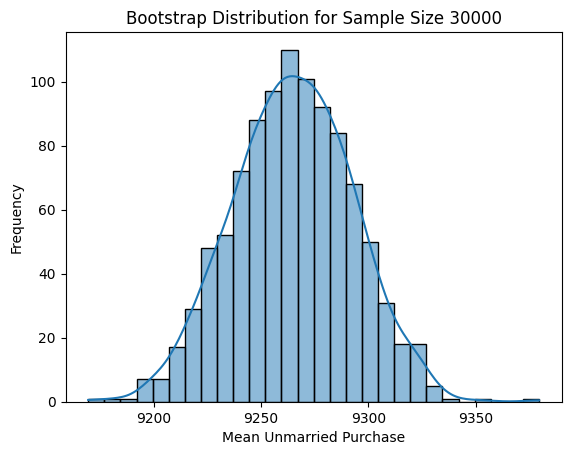

Sample size 30000 CI: [9211.946171666666, 9319.833109166668]


In [ ]:
#Calculating the bootstrapping interval for the male customers
def bootstrap_confidence_interval(data, sample_size, n_bootstrap=1000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means[i] = np.mean(sample)

    # Plot the bootstrap distribution
    sns.histplot(bootstrap_means, kde=True)
    plt.title(f'Bootstrap Distribution for Sample Size {sample_size}')
    plt.xlabel('Mean Unmarried Purchase')
    plt.ylabel('Frequency')
    plt.show()

    lower_limit = np.percentile(bootstrap_means, 2.5)
    upper_limit = np.percentile(bootstrap_means, 97.5)
    return lower_limit, upper_limit

# Sample sizes to analyze
sample_sizes = [300, 3000, 30000]

# Assuming female_customers["Purchase"] is your data
for size in sample_sizes:
    lower_limit, upper_limit = bootstrap_confidence_interval(unmarried_customers["Purchase"], size)
    print(f"Sample size {size} CI: [{lower_limit}, {upper_limit}]")


In [ ]:
'''
i. Is the confidence interval computed using the entire dataset wider for one of the groups (married or unmarried customers)? Why is this the case?
Inference:F or unmarried customers, the confidence interval computed using the CLT method is slightly wider ([9248.62, 9283.20]) compared to that of married customers ([9240.46, 9281.89]).
This suggests that there is slightly more variability in the amount spent by unmarried customers compared to married customers.
ii. How is the width of the confidence interval affected by the sample size?
Inference: For both married and unmarried customers, as the sample size increases, the width of the confidence interval decreases.
For example, for unmarried customers, the confidence interval narrows from 300 to 30000 sample size: [8731.23, 9823.18] to [9209.64, 9318.67].
iii. Do the confidence intervals for different sample sizes overlap?
Inference: For both married and unmarried customers, the confidence intervals for different sample sizes overlap, suggesting no significant difference in the average amount spent between these sample sizes within each group.
iv. How does the sample size affect the shape of the distributions of the means?
Inference: As the sample size increases, the distribution of the means becomes more symmetrical and approaches a normal distribution for both married and unmarried customers, consistent with the Central Limit Theorem.
'''

'\ni. Is the confidence interval computed using the entire dataset wider for one of the groups (married or unmarried customers)? Why is this the case?\nInference:F or unmarried customers, the confidence interval computed using the CLT method is slightly wider ([9248.62, 9283.20]) compared to that of married customers ([9240.46, 9281.89]).\nThis suggests that there is slightly more variability in the amount spent by unmarried customers compared to married customers.\nii. How is the width of the confidence interval affected by the sample size?\nInference: For both married and unmarried customers, as the sample size increases, the width of the confidence interval decreases.\nFor example, for unmarried customers, the confidence interval narrows from 300 to 30000 sample size: [8731.23, 9823.18] to [9209.64, 9318.67].\niii. Do the confidence intervals for different sample sizes overlap?\nInference: For both married and unmarried customers, the confidence intervals for different sample sizes 

In [ ]:
def creating_dfs_on_age(df, x):
    return df[df["Age"] == x].copy()

# Create an empty dictionary to store DataFrames for each age
age_dfs = {}

# Loop through unique age values
for age_value in df["Age"].unique():
    age_dfs[age_value] = creating_dfs_on_age(df, age_value)

    # Convert each DataFrame to ensure they are dedicated DataFrames
    age_dfs[age_value] = pd.DataFrame(age_dfs[age_value])

In [ ]:
def computingclt(data):
  mean = np.mean(data)
  std_dev = np.std(data)
  std_err = std_dev/np.sqrt(len(data))
  z = norm.ppf(1 - (1 - 0.95) / 2)
  lower_limit = mean - (z * std_err)
  upper_limit = mean + (z* std_err)
  plt.subplot(1,2,1)
  sns.histplot(data, kde = True)
  plt.title("Distribution of data")
  print(f'Mean:- {mean}, Lower Limit:- {lower_limit}, Upper Limit:- {upper_limit}')

def bootstrapping(data, samplesize, num_sample = 10000, confidence_interval = 0.95):
  boot_means = []
  for i in range(num_sample):
    sample = np.random.choice(data["Purchase"], size = samplesize)
    samp_mean = np.mean(sample)
    std_sample = np.std(sample)
    boot_means.append(samp_mean)
  plt.subplot(1,2,2)
  sns.histplot(boot_means, kde = True)
  plt.title("distribution of bootstrapped means")
  upper_limit = np.percentile(boot_means, (1-(1-confidence_interval)/2)*100)
  lower_limit = np.percentile(boot_means, (1-confidence_interval)/2 * 100)
  print(f'Sample Size:- {samplesize}, Upper Limit:- {upper_limit}, Lower Limit:- {lower_limit}')


calculating CLT for age group 0-17
Mean:- 8933.464640444974, Lower Limit:- 8851.950669457377, Upper Limit:- 9014.97861143257
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9505.875083333332, Lower Limit:- 8366.9415
Sample Size:- 3000, Upper Limit:- 9118.178208333335, Lower Limit:- 8746.332466666667
Sample Size:- 30000, Upper Limit:- 8991.1038175, Lower Limit:- 8874.7809475


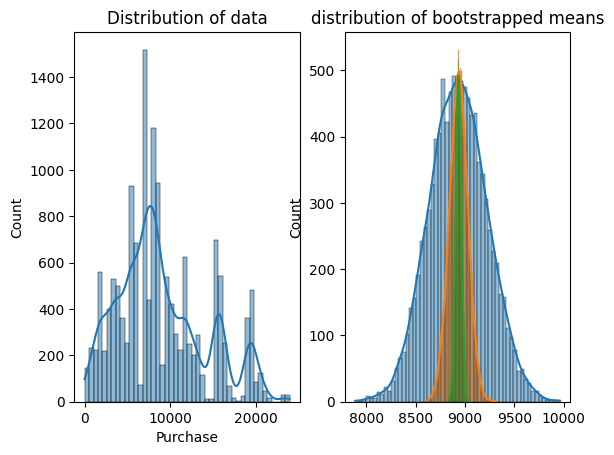

In [ ]:
print("calculating CLT for age group 0-17")
computingclt(age_dfs["0-17"]["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs["0-17"], i)

calculating CLT for age group 18-25
Mean:- 9169.663606261289, Lower Limit:- 9138.40810556528, Upper Limit:- 9200.919106957297
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9748.554083333333, Lower Limit:- 8603.759916666668
Sample Size:- 3000, Upper Limit:- 9347.420199999999, Lower Limit:- 8990.586691666667
Sample Size:- 30000, Upper Limit:- 9226.657570833333, Lower Limit:- 9111.089555833334


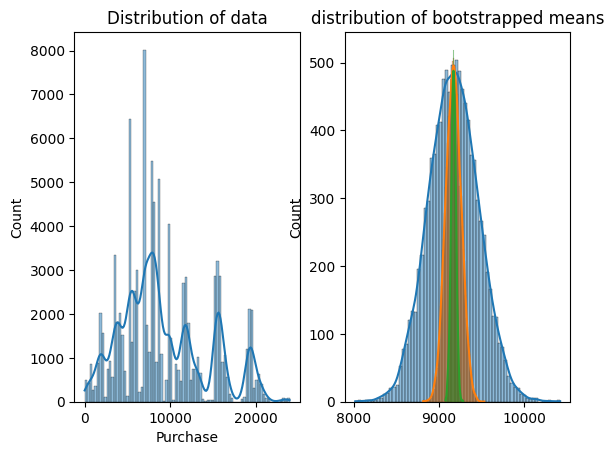

In [ ]:
print("calculating CLT for age group 18-25")
computingclt(age_dfs["18-25"]["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs["18-25"], i)

calculating CLT for age group 26-35
Mean:- 9252.690632869888, Lower Limit:- 9231.733724119113, Upper Limit:- 9273.647541620663
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9835.933833333333, Lower Limit:- 8690.191499999999
Sample Size:- 3000, Upper Limit:- 9432.333583333333, Lower Limit:- 9073.957575
Sample Size:- 30000, Upper Limit:- 9309.110415833333, Lower Limit:- 9196.641098333334


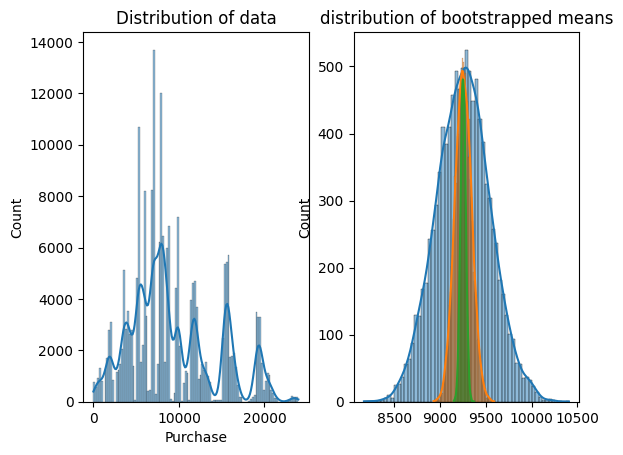

In [ ]:
print("calculating CLT for age group 26-35")
computingclt(age_dfs["26-35"]["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs["26-35"], i)

calculating CLT for age group 36-45
Mean:- 9331.350694917874, Lower Limit:- 9301.669545864605, Upper Limit:- 9361.031843971143
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9902.87, Lower Limit:- 8773.937166666667
Sample Size:- 3000, Upper Limit:- 9512.489283333332, Lower Limit:- 9151.125516666667
Sample Size:- 30000, Upper Limit:- 9388.529710833333, Lower Limit:- 9275.312080833333


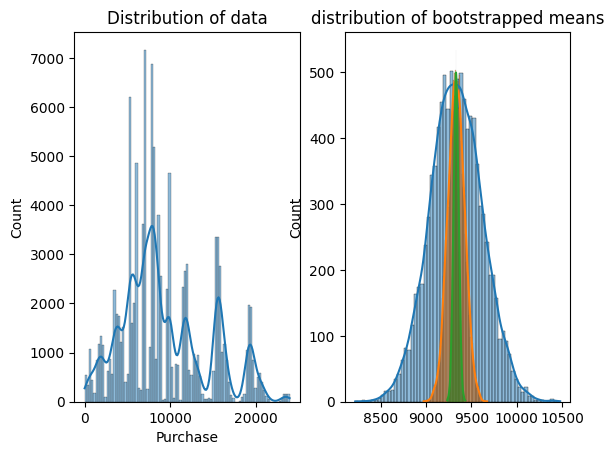

In [ ]:
print("calculating CLT for age group 36-45")
computingclt(age_dfs['36-45']["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs['36-45'], i)

calculating CLT for age group 46-50
Mean:- 9208.625697468327, Lower Limit:- 9163.085640896097, Upper Limit:- 9254.165754040558
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9774.85725, Lower Limit:- 8670.162999999999
Sample Size:- 3000, Upper Limit:- 9388.720666666666, Lower Limit:- 9032.468333333334
Sample Size:- 30000, Upper Limit:- 9264.726279166665, Lower Limit:- 9151.625498333335


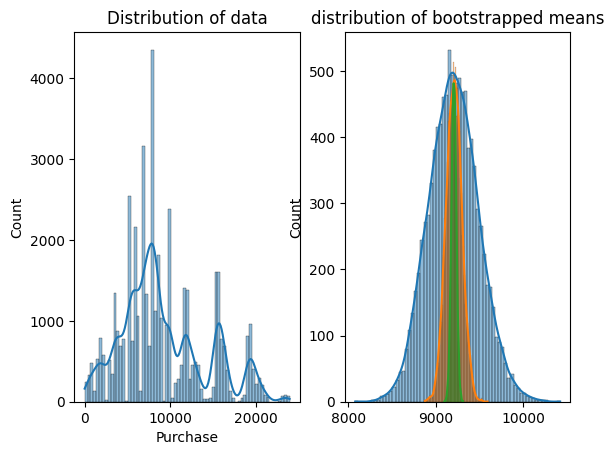

In [ ]:
print("calculating CLT for age group 46-50")
computingclt(age_dfs['46-50']["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs['46-50'], i)

calculating CLT for age group 51-55
Mean:- 9534.808030960236, Lower Limit:- 9483.992132719022, Upper Limit:- 9585.623929201449
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 10122.774416666667, Lower Limit:- 8974.189416666666
Sample Size:- 3000, Upper Limit:- 9718.085633333334, Lower Limit:- 9356.2126
Sample Size:- 30000, Upper Limit:- 9592.018802499999, Lower Limit:- 9476.66649


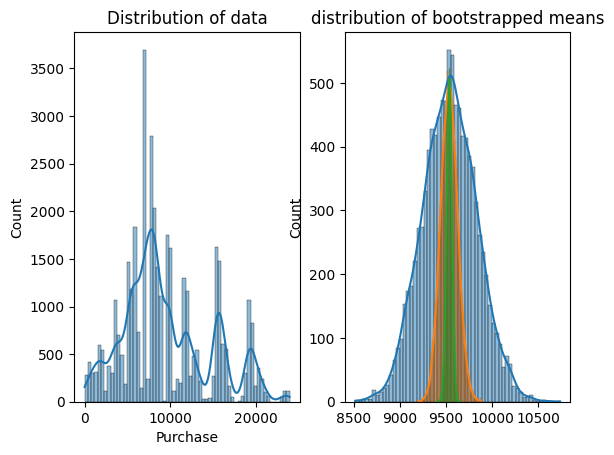

In [ ]:
print("calculating CLT for age group 51-55")
computingclt(age_dfs['51-55']["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs['51-55'], i)

calculating CLT for age group 55+
Mean:- 9336.280459449405, Lower Limit:- 9269.300391858294, Upper Limit:- 9403.260527040515
Calculating the CI using the bootstapping method
Sample Size:- 300, Upper Limit:- 9903.604333333333, Lower Limit:- 8784.584166666666
Sample Size:- 3000, Upper Limit:- 9518.450083333333, Lower Limit:- 9157.450133333334
Sample Size:- 30000, Upper Limit:- 9393.205555, Lower Limit:- 9279.294184166667


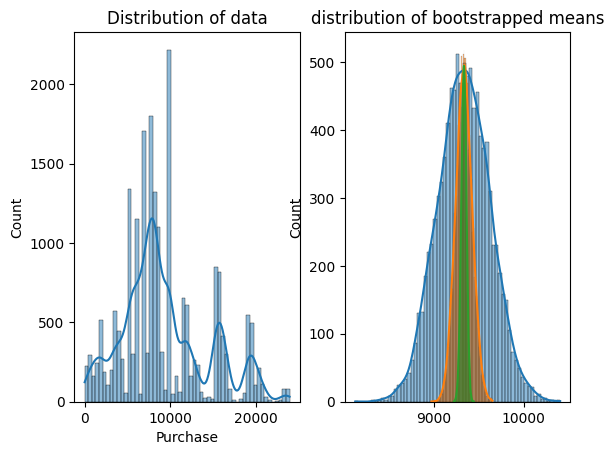

In [ ]:
print("calculating CLT for age group 55+")
computingclt(age_dfs['55+']["Purchase"])
samps = [300, 3000, 30000]
print("Calculating the CI using the bootstapping method")
for i in samps:
  bootstrapping(age_dfs['55+'], i)

In [ ]:
'''
Comparing the width of the confidence intervals (upper limit - lower limit) for each age group.

For age group 0-17, the CI width is: 9014.98 − 8851.95 = 163.03
For age group 18-25, the CI width is 9200.92 − 9138.41 = 62.51
For age group 26-35, the CI width is 9273.65−9231.73=41.91.
For age group 36-45, the CI width is 9361.03−9301.67=59.36.
For age group 46-50, the CI width is 9254.17−9163.09=91.08.
For age group 51-55, the CI width is 9585.62−9483.99=101.63.
For age group 55+, the CI width is 9403.26−9269.30=133.96.
Inference: The age group 0-17 has the widest confidence interval, followed by age group 55+. This could be due to higher
variability in the spending patterns of these age groups, which results in a larger standard deviation.
'''

'\nComparing the width of the confidence intervals (upper limit - lower limit) for each age group.\n\nFor age group 0-17, the CI width is: 9014.98 − 8851.95 = 163.03\nFor age group 18-25, the CI width is 9200.92 − 9138.41 = 62.51\nFor age group 26-35, the CI width is 9273.65−9231.73=41.91.\nFor age group 36-45, the CI width is 9361.03−9301.67=59.36.\nFor age group 46-50, the CI width is 9254.17−9163.09=91.08.\nFor age group 51-55, the CI width is 9585.62−9483.99=101.63.\nFor age group 55+, the CI width is 9403.26−9269.30=133.96.\nInference: The age group 0-17 has the widest confidence interval, followed by age group 55+. This could be due to higher\nvariability in the spending patterns of these age groups, which results in a larger standard deviation.\n'

In [ ]:
'''
ii. How is the width of the confidence interval affected by the sample size?

Observation: For each age group, compare the width of the confidence intervals calculated using different sample sizes.

For age group 0-17:
Sample size 300:
9508.63−8362.74=1145.89
Sample size 3000: 9121.72−8754.76=366.96
Sample size 30000: 8990.59−8874.57=116.02
Inference: As the sample size increases, the width of the confidence interval decreases. This is expected because larger samples provide
more information and reduce the uncertainty (standard error) of the estimate and similar trend can be observed in all age groups.
'''

'\nii. How is the width of the confidence interval affected by the sample size?\n\nObservation: For each age group, compare the width of the confidence intervals calculated using different sample sizes.\n\nFor age group 0-17:\nSample size 300: \n9508.63−8362.74=1145.89\nSample size 3000: 9121.72−8754.76=366.96\nSample size 30000: 8990.59−8874.57=116.02\nInference: As the sample size increases, the width of the confidence interval decreases. This is expected because larger samples provide\nmore information and reduce the uncertainty (standard error) of the estimate and similar trend can be observed in all age groups.\n'

In [ ]:
'''
iii: Do the confidence intervals for different sample sizes overlap?
We can observe that the confidence interval overlaps and it shows that the despite increase in the
sample size, central tendancy of the data, remains consistent
iv: How does sample size effects shape of distribution:
The shape of the distribution of means becomes more normal and concentrated around the true mean as the sample size increases.
'''

'\niii: Do the confidence intervals for different sample sizes overlap?\nWe can observe that the confidence interval overlaps and it shows that the despite increase in the \nsample size, central tendancy of the data, remains consistent\niv: How does sample size effects shape of distribution: \nThe shape of the distribution of means becomes more normal and concentrated around the true mean as the sample size increases.\n'

In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)